Mean Squared Error: 0.00
R^2 Score: 1.00


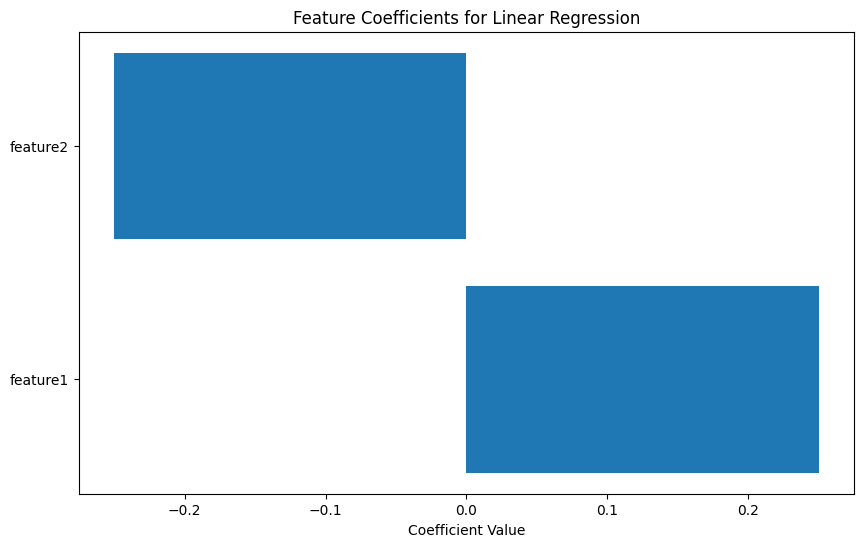

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Create a larger dummy dataset
data = {
    'feature1': list(range(1, 101)),
    'feature2': list(range(100, 0, -1)),
    'rating': [x * 0.5 + 2 for x in range(1, 101)]
}
df = pd.DataFrame(data)

# Data Preprocessing
df.fillna(df.mean(), inplace=True)
df = pd.get_dummies(df, drop_first=True)

# Split data into features and target variable
X = df.drop('rating', axis=1)
y = df['rating']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Interpretation (coefficients)
coefficients = model.coef_
features = X.columns

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.barh(features, coefficients)
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients for Linear Regression')
plt.show()

# New Section